In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [21]:
defect_dict = load_tensors_all('./Data/For_Andy11.24/Conn1/', width=128)

(278, 167, 62)
(67, 167, 62)
(72, 59, 175)
(10, 59, 175)
(63, 256, 83)
(72, 256, 83)


In [22]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 562
number of class 0: 413
	number of SN: 19
number of class 1: 149
	number of SN: 5


In [23]:
set([x.split('/')[0] for x in sns[labels==1]])

{'F3X625518LTH9CC21',
 'F3X62630KAXH9CC21',
 'F3Y6251VH7H9CC21',
 'F3Y62760Q82HPCC21',
 'F3Y62760ZVGH9CC21'}

In [24]:
display_tensor

<function defectlib.Display.display_tensor>

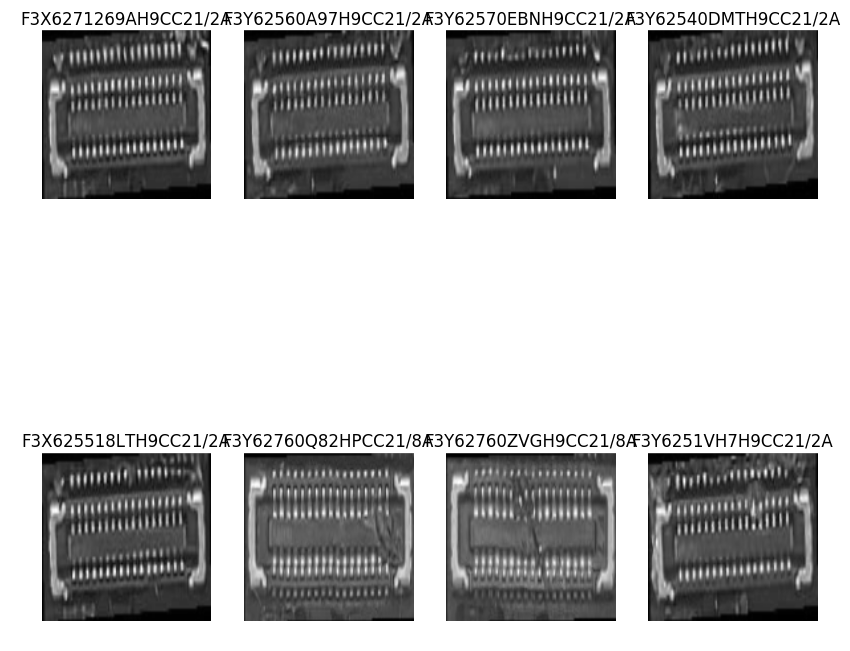

In [25]:
display_tensor(tensors, labels, sns)

In [26]:
from defectlib import GroupKFold_modeling

In [27]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=2, nb_epoch=30, input_shape=(128, 128))

Model 1
the label of validation image: 0
the s/n of validation image: F3Y62551RKDH9CC21
Train on 523 samples, validate on 39 samples
Epoch 1/30
523/523 [==============================] - 12s - loss: 0.6154 - acc: 0.7055 - val_loss: 0.2793 - val_acc: 1.0000
Epoch 2/30
523/523 [==============================] - 11s - loss: 0.5452 - acc: 0.7304 - val_loss: 0.2790 - val_acc: 1.0000
Epoch 3/30
523/523 [==============================] - 11s - loss: 0.5313 - acc: 0.7591 - val_loss: 0.3839 - val_acc: 0.5897
Epoch 4/30
523/523 [==============================] - 11s - loss: 0.5061 - acc: 0.7629 - val_loss: 0.5089 - val_acc: 0.5128
Epoch 5/30
523/523 [==============================] - 11s - loss: 0.4717 - acc: 0.7763 - val_loss: 0.4585 - val_acc: 0.5128
Epoch 6/30
523/523 [==============================] - 11s - loss: 0.4019 - acc: 0.8164 - val_loss: 0.6419 - val_acc: 0.5128
Epoch 7/30
523/523 [==============================] - 11s - loss: 0.3762 - acc: 0.8145 - val_loss: 0.1758 - val_acc: 1.0000

In [28]:
accuracy_dict

{0: 0.94093567251461985, 1: 0.32848522167487682}

In [29]:
escape_dict

{0: 0.9409356725146198, 1: 0.6715147783251231}

In [66]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, 'F3Y62551RKDH9CC21', 1.0, 1.0),
 (0, 'F3Y62560U31H9CC21', 0.52777777777777779, 0.5277777777777778),
 (0, 'F3Y62520BMBH9CC21', 1.0, 1.0),
 (0, 'F3Y62750UWOH9CC21', 0.40000000000000002, 0.4),
 (0, 'F3Y62621YHFH9CC21', 1.0, 1.0),
 (0, 'F3Y62561UUPH9CC21', 1.0, 1.0),
 (0, 'F3X62610SZ2H9CC21', 1.0, 1.0),
 (0, 'F3Y6256110XH9CC21', 1.0, 1.0),
 (0, 'F3Y62570EBNH9CC21', 0.94999999999999996, 0.95),
 (0, 'F3Y62611EGEH9CC21', 1.0, 1.0),
 (0, 'F3X62821FE6H9CC21', 1.0, 1.0),
 (0, 'F3X6271269AH9CC21', 1.0, 1.0),
 (0, 'F3X62671S1GH9CC21', 1.0, 1.0),
 (0, 'F3X62571GREH9CC21', 1.0, 1.0),
 (0, 'F3Y62610W71H9CC21', 1.0, 1.0),
 (0, 'F3Y62540DMTH9CC21', 1.0, 1.0),
 (0, 'F3Y62560A97H9CC21', 1.0, 1.0),
 (0, 'F3V62770TU1H9CC21', 1.0, 1.0),
 (0, 'F3Y6262015EH9CC21', 1.0, 1.0),
 (1, 'F3Y62760Q82HPCC21', 0.0, 1.0),
 (1, 'F3Y6251VH7H9CC21', 0.34285714285714286, 0.6571428571428571),
 (1, 'F3X625518LTH9CC21', 0.0, 1.0),
 (1, 'F3Y62760ZVGH9CC21', 0.86206896551724133, 0.13793103448275862),
 (1, 'F3X62630KAXH9CC21

In [30]:
for label in set([x[0] for x in accuracy_escape_list]):
    accuracy_result = [x[2] for x in accuracy_escape_list if x[0] == label]
    accuracy_result.sort(reverse=True)
    accuracy_final = np.array(accuracy_result)
    escape_tight = 1 - accuracy_final
    escape_result = [x[3] for x in accuracy_escape_list if x[0] == label]
    escape_result.sort()
    escape_final = np.array(escape_result)
    escape_rough = escape_final
    print 'Result for label {}'.format(label)
    print escape_tight
    print escape_rough
    print "\tPick 1 test"
    print '\t\tTight Escape rate: {}'.format(escape_tight[0])
    print '\t\tRough Escape rate: {}'.format(escape_rough[0])
    print "\tPick 2 test"
    print "\t\tTight Escape rate: {}".format((escape_tight[0] + escape_tight[1]) / 2)
    print "\t\trough Escape rate: {}".format((escape_rough[0] + escape_rough[1]) / 2)

Result for label 0
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.05        0.47222222  0.6       ]
[ 0.4         0.52777778  0.95        1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.        ]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.4
	Pick 2 test
		Tight Escape rate: 0.0
		rough Escape rate: 0.463888888889
Result for label 1
[ 0.13793103  0.5625      0.65714286  1.          1.        ]
[ 0.13793103  0.5625      0.65714286  1.          1.        ]
	Pick 1 test
		Tight Escape rate: 0.137931034483
		Rough Escape rate: 0.137931034483
	Pick 2 test
		Tight Escape rate: 0.350215517241
		rough Escape rate: 0.350215517241


In [32]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, 'F3Y62551RKDH9CC21', 1.0, 1.0),
 (0, 'F3Y62560U31H9CC21', 0.52777777777777779, 0.5277777777777778),
 (0, 'F3Y62520BMBH9CC21', 1.0, 1.0),
 (0, 'F3Y62750UWOH9CC21', 0.40000000000000002, 0.4),
 (0, 'F3Y62621YHFH9CC21', 1.0, 1.0),
 (0, 'F3Y62561UUPH9CC21', 1.0, 1.0),
 (0, 'F3X62610SZ2H9CC21', 1.0, 1.0),
 (0, 'F3Y6256110XH9CC21', 1.0, 1.0),
 (0, 'F3Y62570EBNH9CC21', 0.94999999999999996, 0.95),
 (0, 'F3Y62611EGEH9CC21', 1.0, 1.0),
 (0, 'F3X62821FE6H9CC21', 1.0, 1.0),
 (0, 'F3X6271269AH9CC21', 1.0, 1.0),
 (0, 'F3X62671S1GH9CC21', 1.0, 1.0),
 (0, 'F3X62571GREH9CC21', 1.0, 1.0),
 (0, 'F3Y62610W71H9CC21', 1.0, 1.0),
 (0, 'F3Y62540DMTH9CC21', 1.0, 1.0),
 (0, 'F3Y62560A97H9CC21', 1.0, 1.0),
 (0, 'F3V62770TU1H9CC21', 1.0, 1.0),
 (0, 'F3Y6262015EH9CC21', 1.0, 1.0),
 (1, 'F3Y62760Q82HPCC21', 0.0, 1.0),
 (1, 'F3Y6251VH7H9CC21', 0.34285714285714286, 0.6571428571428571),
 (1, 'F3X625518LTH9CC21', 0.0, 1.0),
 (1, 'F3Y62760ZVGH9CC21', 0.86206896551724133, 0.13793103448275862),
 (1, 'F3X62630KAXH9CC21

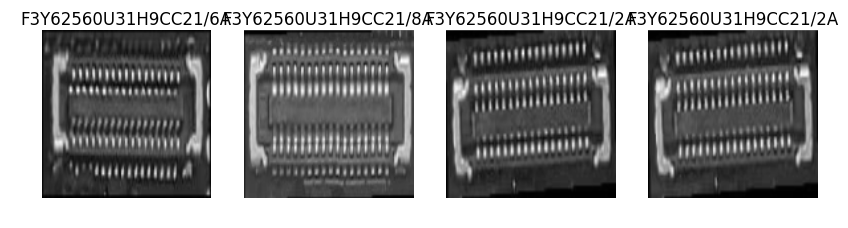

In [52]:
find_tensor(tensors, labels, sns, 'F3Y62560U31H9CC21')

In [53]:
from IPython.display import Image

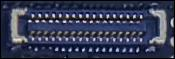

In [61]:
Image('./Data/For_Andy11.24/Conn1/6A/Conn1_6A_c0/Conn1_Recombination_F3Y62560U31H9CC21_6A_2.jpg')

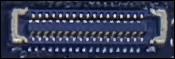

In [62]:
Image('./Data/For_Andy11.24/Conn1/6A/Conn1_6A_c0/Conn1_Recombination_F3Y62551RKDH9CC21_6A_2.jpg')

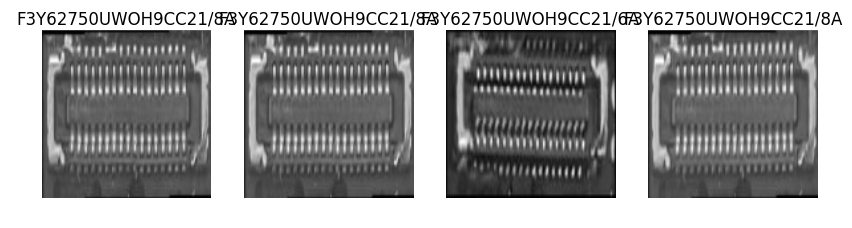

In [63]:
find_tensor(tensors, labels, sns, 'F3Y62750UWOH9CC21')

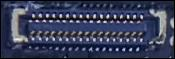

In [64]:
Image('./Data/For_Andy11.24/Conn1/6A/Conn1_6A_c0/Conn1_Recombination_F3Y62750UWOH9CC21_6A_2.jpg')

In [42]:
sn_only = np.array([x.split('/')[0] for x in sns])

In [44]:
def find_tensor(tensors, labels, sns, nb_sn):
    '''
    '''
    sn_only = np.array([x.split('/')[0] for x in sns])
    display_tensor(tensors[sn_only == nb_sn], labels[sn_only == nb_sn], sns[sn_only == nb_sn])

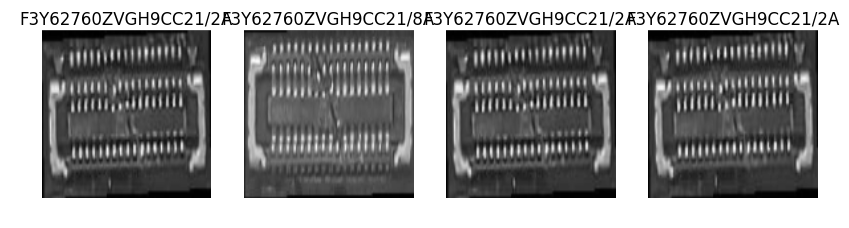

In [45]:
find_tensor(tensors, labels, sns, 'F3Y62760ZVGH9CC21')

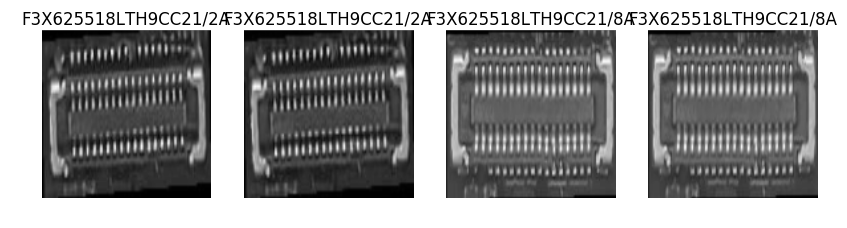

In [46]:
find_tensor(tensors, labels, sns, 'F3X625518LTH9CC21')

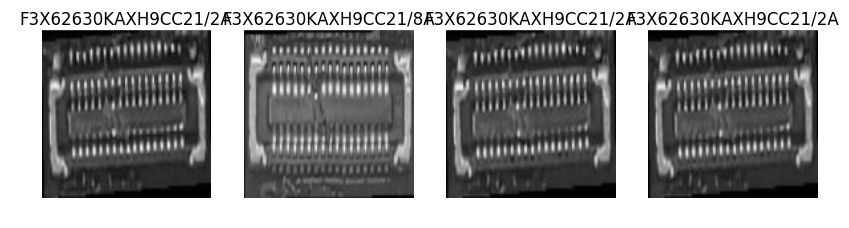

In [49]:
find_tensor(tensors, labels, sns, 'F3X62630KAXH9CC21')

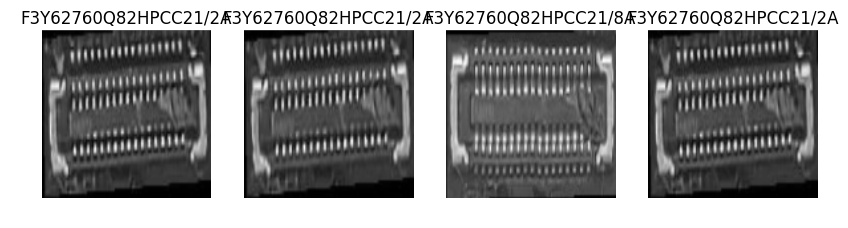

In [43]:
display_tensor(tensors[sn_only == 'F3Y62760Q82HPCC21'], labels[sn_only == 'F3Y62760Q82HPCC21'], sns[sn_only == 'F3Y62760Q82HPCC21'])

In [34]:
test_model = models[0]

In [35]:
tensors_k, labels_k = keras_transform(tensors, labels)

In [40]:
predict = test_model.predict_classes(tensors_k)

562/562 [==============================] - 2s     


In [37]:
labels

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0,

In [39]:
from sklearn.metrics import classification_report

In [41]:
print classification_report(labels, predict)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       413
          1       1.00      1.00      1.00       149

avg / total       1.00      1.00      1.00       562

